<img src="./logo_UTN.svg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# TS9: Estimación espectral a prueba: Ancho de banda del Electrocardiograma.
#### Pablo Romero


# Consigna
Se pide:

a) Establezca una plantilla de diseño para los filtros digitales que necesitará para que la señal de ECG se asemeje a los latidos promedio en cuanto a suavidad de los trazos y nivel isoeléctrico nulo.

### Defina la plantilla del filtro

fs0 = ?? fin de la banda de detenida 0

fc0 = ?? comienzo de la banda de paso

fc1 = ?? fin de la banda de paso

fs1 = ?? comienzo de la banda de detenida 1





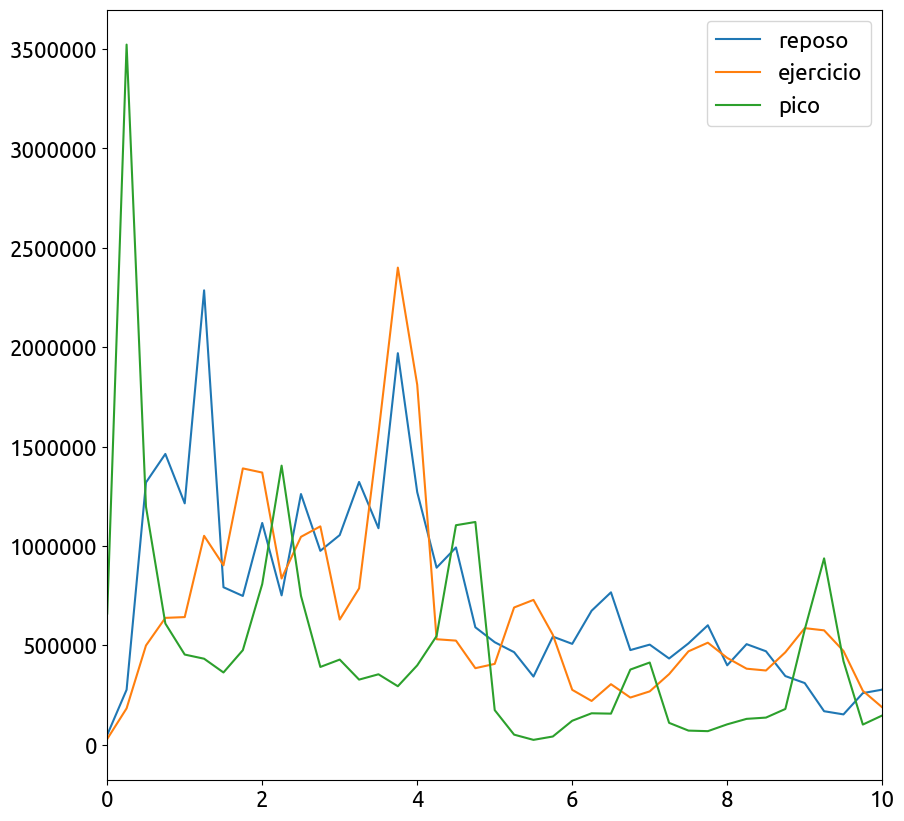

In [10]:
# Módulos para Jupyter
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib as mpl
#%%  Inicialización de librerías
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del documento
mpl.rcParams['figure.figsize'] = (10,10)

from numpy.fft import fft
import matplotlib.pyplot as plt
import scipy.signal as sig
import scipy.io as sio


#%% Esto tiene que ver con cuestiones de presentación de los gráficos,
# NO ES IMPORTANTE
fig_sz_x = 14
fig_sz_y = 13
fig_dpi = 80 # dpi

fig_font_family = 'Ubuntu'
fig_font_size = 16

plt.rcParams.update({'font.size':fig_font_size})
plt.rcParams.update({'font.family':fig_font_family})

##############################################
#%% A partir de aquí comienza lo IMPORTANTE #
#############################################

vmax=1       #Amplitud Maxima [Volts]
dc=0            #Valor de continua [Volts]
f0=1 #Frecuencia en [Hz][]
ph=np.pi*1   #Fase [rad]
nn=1000  #Muestras del ADC
fs=1000#Frecuencia de muestreio del ADC [Hz]
k0=nn/4
f0=k0*fs/nn #Frecuencia en [Hz][]         
Ts=1/fs
delta_f=fs/nn
B_bits=4
vf=2
SNRa=25

block = 4000
# block = 4000
# block = 2000

mat_struct = sio.loadmat('ECG_TP4.mat')
ecg_one_lead = mat_struct['ecg_lead']


#Analizando la señal ecg completa, identificamos bloques relacionados al
#paciente en reposo,donde el perido es mayor, en ejercico, donde el periodo
#aumenta y el pico de exigencia, donde el periodo es máximo. 

ecg_reposo= ecg_one_lead[0:100000]
ecg_ejercicio= ecg_one_lead[450000:550000]
ecg_pico= ecg_one_lead[750000:850000]


#Calculamos la densidad espectral de potencia para cada caso.
ff, Pxx_reposo = sig.welch(ecg_reposo,fs=fs, nperseg=block, axis = 0 )
ff, Pxx_ejercicio = sig.welch(ecg_ejercicio,fs=fs, nperseg=block, axis = 0 )
ff, Pxx_pico = sig.welch(ecg_pico,fs=fs, nperseg=block, axis = 0 )



plt.figure(0)
plt.clf()


plt.plot(ff, Pxx_reposo, label = 'reposo')
plt.plot(ff, Pxx_ejercicio, label = 'ejercicio')
plt.plot(ff, Pxx_pico, label = 'pico')
plt.legend()
plt.xlim(0,10)

plt.show()



Encontramos picos en 0,25Hz; 0,75Hz; 1,25Hz; 1,89Hz; 2,25Hz.
La tendencia es que a medida que se aumenta el ritmo cardiaco, los picos de interes se desplazan hacia la derecha. Por lo que esta claro que el pico de 0,25Hz que aparece en el maximo esfuerzo es ruido y debemos filtrarlo.

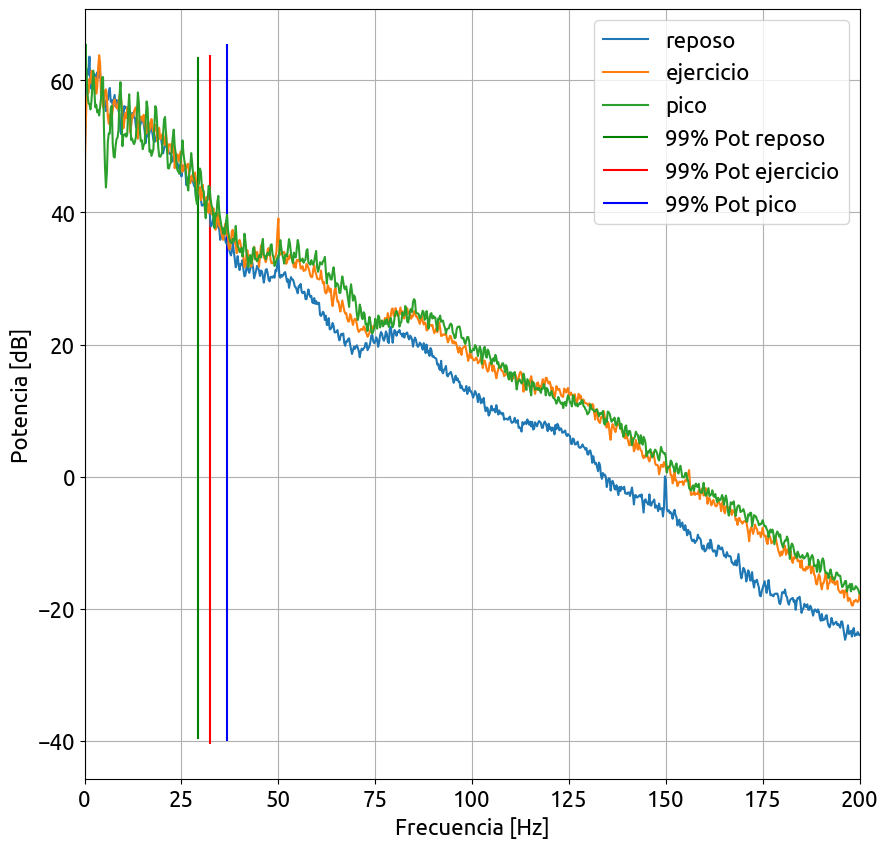

In [11]:
#Buscamos la frecuencia de corte para un bw que represente el 90%, 95% y 99% de potencia de la señal
#para los tres casos.

bw90 = 0.90
bw95 = 0.95
bw99 = 0.99

index_Energia = np.where(np.cumsum(Pxx_reposo)/np.sum(Pxx_reposo) > bw90)[0]
W_corte90rep = ff[index_Energia[0]]

index_Energia = np.where(np.cumsum(Pxx_reposo)/np.sum(Pxx_reposo) > bw95)[0]
W_corte95rep = ff[index_Energia[0]]

index_Energia = np.where(np.cumsum(Pxx_reposo)/np.sum(Pxx_reposo) > bw99)[0]
W_corte99rep = ff[index_Energia[0]]

index_Energia = np.where(np.cumsum(Pxx_ejercicio)/np.sum(Pxx_ejercicio) > bw90)[0]
W_corte90ej = ff[index_Energia[0]]

index_Energia = np.where(np.cumsum(Pxx_ejercicio)/np.sum(Pxx_ejercicio) > bw95)[0]
W_corte95ej = ff[index_Energia[0]]

index_Energia = np.where(np.cumsum(Pxx_ejercicio)/np.sum(Pxx_ejercicio) > bw99)[0]
W_corte99ej = ff[index_Energia[0]]

index_Energia = np.where(np.cumsum(Pxx_pico)/np.sum(Pxx_pico) > bw90)[0]
W_corte90pic = ff[index_Energia[0]]

index_Energia = np.where(np.cumsum(Pxx_pico)/np.sum(Pxx_pico) > bw95)[0]
W_corte95pic = ff[index_Energia[0]]

index_Energia = np.where(np.cumsum(Pxx_pico)/np.sum(Pxx_pico) > bw99)[0]
W_corte99pic = ff[index_Energia[0]]




plt.figure(1)
plt.clf()


plt.plot(ff, 10*np.log10(Pxx_reposo), label = 'reposo')
plt.plot(ff, 10*np.log10(Pxx_ejercicio), label = 'ejercicio')
plt.plot(ff, 10*np.log10(Pxx_pico), label = 'pico')

plt.vlines(W_corte99rep,np.min(10*np.log10(Pxx_reposo)),np.max(10*np.log10(Pxx_reposo)),label='99% Pot reposo',color='g')
plt.vlines(W_corte99ej,np.min(10*np.log10(Pxx_ejercicio)),np.max(10*np.log10(Pxx_ejercicio)),label='99% Pot ejercicio',color='r')
plt.vlines(W_corte99pic,np.min(10*np.log10(Pxx_pico)),np.max(10*np.log10(Pxx_pico)),label='99% Pot pico',color='b')

plt.xlabel("Frecuencia [Hz]")
plt.ylabel('Potencia [dB]')
plt.xlim([0,200])
plt.grid()
plt.legend()

plt.show()






Con el grafico en db notamos pico en 50Hz debido al ruido de linea y su armonica en 150Hz. Por lo que la fs1 sera de 50Hz. Por otro lado, la fp1 la definimos con la frecuencia de corte para el 99% de potencia en la señal de pico de esfuerzo, que es de 36.75Hz

In [12]:
W_corte99pic

36.75

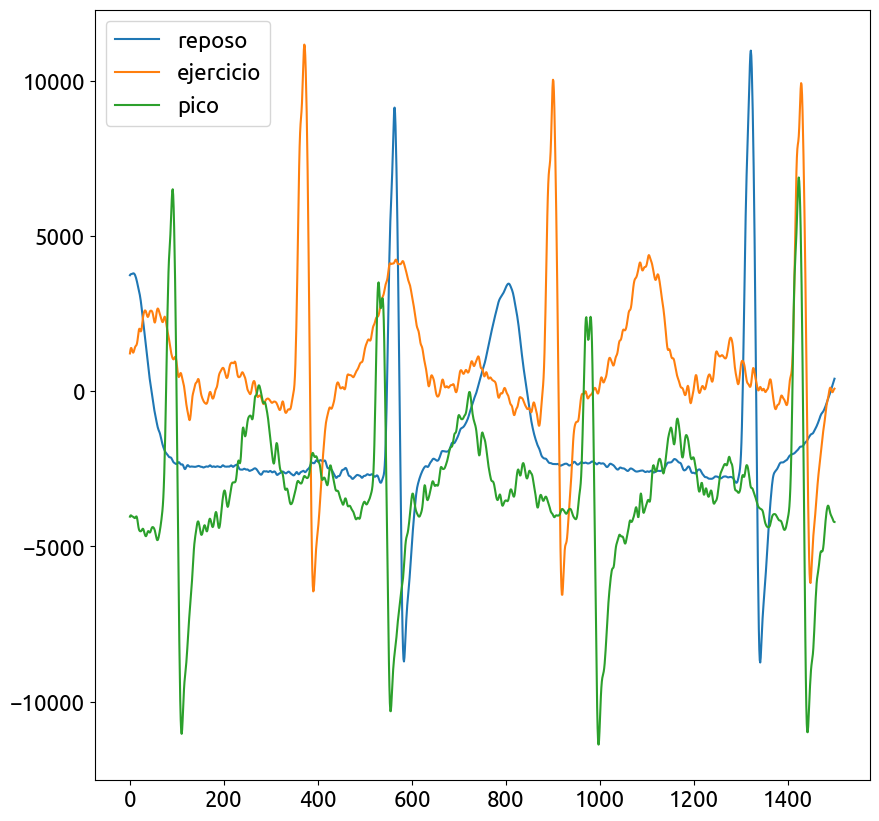

In [13]:
plt.figure(2)
plt.clf()

plt.plot(ecg_reposo[3000:4500], label = 'reposo')
plt.plot(ecg_ejercicio[3000:4500], label = 'ejercicio')
plt.plot(ecg_pico[3000:4500], label = 'pico')

#De medir la distancia entre picos, sacamos que la frecuencia cardiaca en cada caso esta en el orden de
#1,32HZ para reposo, 1,89Hz para ejercicio y 2,26Hz para pico.

plt.legend()

plt.show()

 

De medir la distancia entre picos, sacamos que la frecuencia cardiaca en cada caso esta en el orden de 1,32HZ para reposo, 1,89Hz para ejercicio y 2,26Hz para pico.

Por lo tanto, podemos identificar con bastante exactitud cuales son los picos del espectro que realmente llevan informacion, y notar tambien cuales son no deseados y queremos tratar de filtrar.

Por lo que la plantilla queda definida de la siguiente manera:
fs0 = 0.25Hz
fp0 = 0,75Hz
fp1 = 36.75Hz
fs1 = 50Hz

No handles with labels found to put in legend.


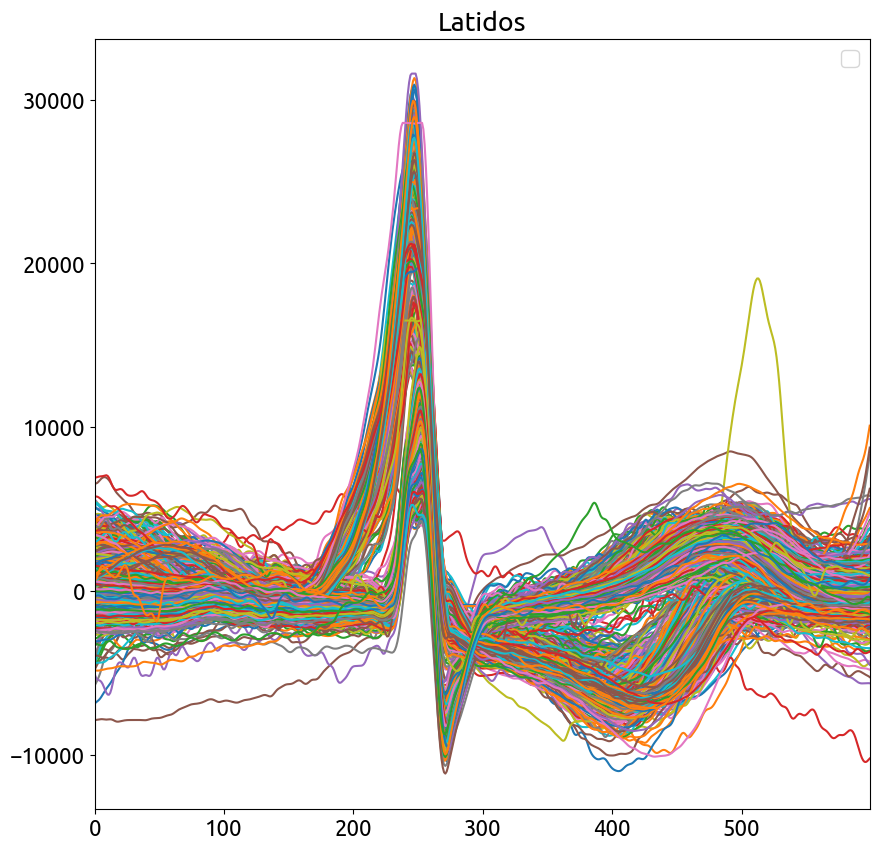

In [15]:
qrs_detections = mat_struct['qrs_detections']


# Viendo el grafico podemos ver que el latido va desde 0 a 600
# qsr me da el pico del latido que se encuentra en la primera muestra en 250
# por eso si me quiero quedar con toda la informacion desde el ecg selecciono desde
# (pico - 250) hasta (pico + 350)
inferior = 250
sup = 350

latido = (ecg_one_lead[int(qrs_detections[0] - inferior):int(qrs_detections[0] + sup)])
realizaciones = np.arange(len(qrs_detections))
latidos = np.zeros([sup+inferior, qrs_detections.shape[0]])

for i in realizaciones:
    latidos[:,i] = ecg_one_lead[int(qrs_detections[i] - inferior):int(qrs_detections[i] + sup)].flatten()
    latidos[:,i]  -= np.mean(latidos[:,i]) # le resto su valor medio para centrarlos


plt.figure(3)
plt.clf()

plt.plot(latidos)
plt.autoscale(enable=True, axis='x', tight=True)
plt.title("Latidos")
plt.legend()
plt.show()




Buscamos un punto en el grafico donde este bien definido cuales son normales y cuales ventriculares 
Lo encontramos en 241, 111000


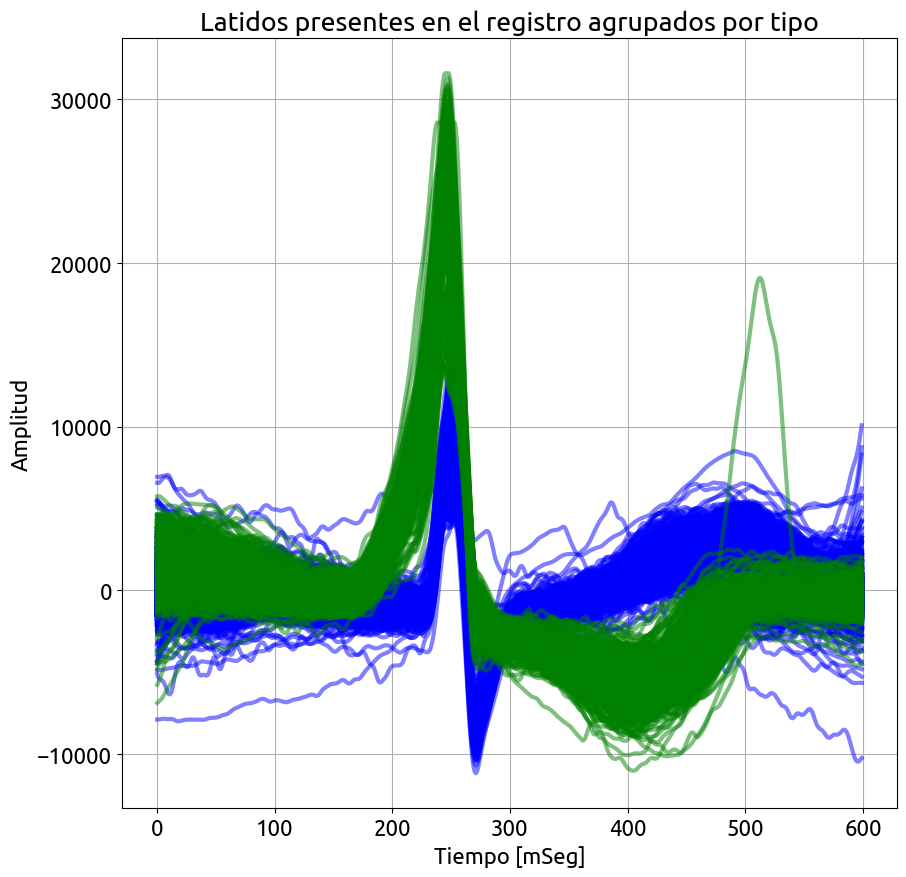

In [17]:
slicing_latidos = latidos[241, :]

# Los que estan por debajo de 11500 son latidos normales
# Caso contrario pertenecen a la categoria de ventriculares
filtro_normal = slicing_latidos < 11100 #vector booleano
filtro_ventricular = slicing_latidos > 11100 #vector booleano

plt.figure(4)
plt.clf()

plt.plot(latidos[:,filtro_normal], 'b',alpha = 0.5, linewidth=3.0)
plt.plot(latidos[:,filtro_ventricular], 'g', alpha = 0.5,  linewidth=3.0)
plt.grid()
plt.title("Latidos presentes en el registro agrupados por tipo")
plt.xlabel('Tiempo [mSeg]')
plt.ylabel('Amplitud')

plt.show()

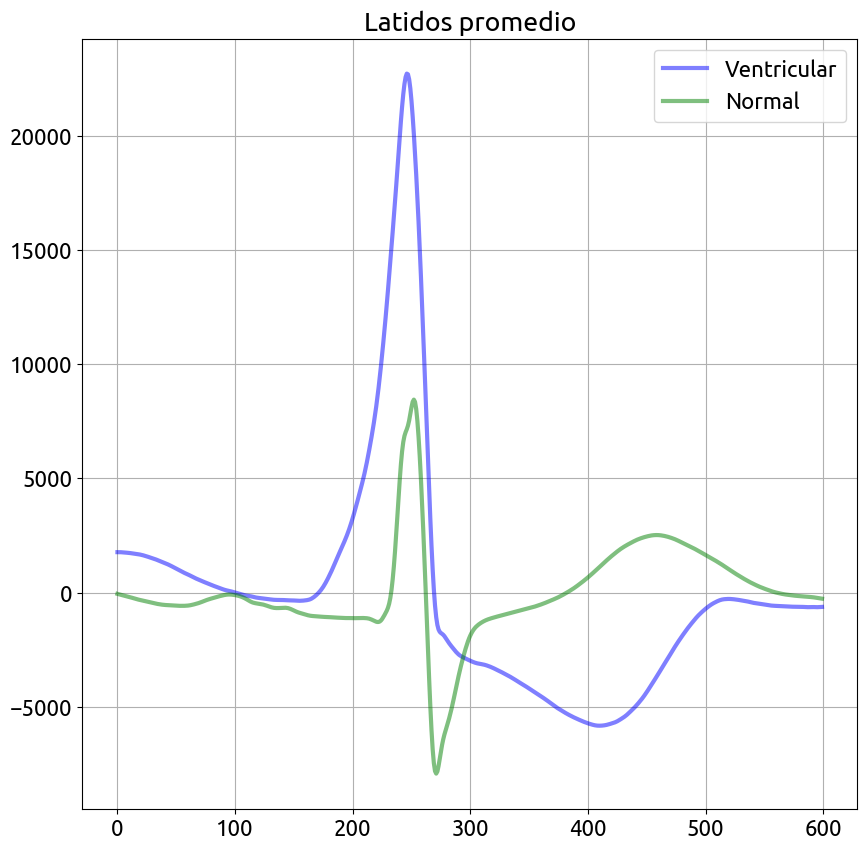

In [19]:
#Por ultimo buscamos graficar una latido ventricular y uno normal que representa la media de
#lo que venimos haciendo

plt.figure(5)
plt.clf()

lat_vent = np.mean(latidos[:,filtro_ventricular], axis = 1)
lat_norm = np.mean(latidos[:,filtro_normal], axis = 1)

plt.plot(lat_vent, 'b', label = 'Ventricular',alpha = 0.5, linewidth=3.0)
plt.plot(lat_norm, 'g', label = 'Normal', alpha = 0.5,  linewidth=3.0)
plt.legend()
plt.grid()
plt.title("Latidos promedio")


plt.show()